# Minicurso Recomendação - SE/UFRJ

Este notebook contém um exemplo prático de recomendação de filmes utilizando o dataset _Movie Lens 100k_. As recomendações são realizadas utilizando a biblioteca _CaseRecommender_. 

## Imports

In [15]:
from caserec.recommenders.rating_prediction.itemknn import ItemKNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Carregando Dados

Os dados estão contidos na pasta `./dataset/ml-100k` e os arquivos a serem utilizados é o `u.data`, que contém informações do ID do usuário, ID do item e a nota que o usuário deu ao item. 

Além disso, o arquivo `u.info` é utilizado para extrair as informações do filme (Título e ID).

In [2]:
df_ratings = pd.read_csv('./dataset/ml-100k/u.data', sep='\t') # Carrega arquivo com dados
df_ratings.columns = ['user', 'item', 'feedback_value', 'timestamp'] # Inserindo nome das colunas
df_ratings.drop(['timestamp'], axis=1, inplace=True) # Retirando coluna de timestamp
df_ratings.head()

,user,item,feedback_value
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4


In [3]:
df_info = pd.read_csv('./dataset/ml-100k/u.item', sep='|', encoding = "ISO-8859-1", header=None) # Carrega arquivo com dados
df_info = df_info[[0, 1]].copy()
df_info.columns = ['item', 'title']
df_info.head()

,item,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Separando dados em treinamento e teste

In [22]:
train_file, test_file = './outputs/train_file.dat', './outputs/test_file.dat' 
# Salvando dados em arquivo
df_train, df_test = train_test_split(df_ratings, test_size=0.3) 
# Salvando dados em arquivo
df_train.to_csv(train_file, sep=' ', index=None, header=None) 
df_test.to_csv(test_file, sep=' ', index=None, header=None)

## Treinando modelo

Treinaremos o modelo ItemKNN que agrupa os itens através de uma distância de similaridade a partir das notas que os usuários deram. 

In [23]:
predictions_output_filepath = './outputs/predictions.dat'
model = ItemKNN(train_file=train_file, 
                test_file=test_file, 
                k_neighbors=30, 
                sep=' ', 
                output_file = predictions_output_filepath)

In [24]:
%%time
model.compute(verbose=True)

[Case Recommender: Rating Prediction > ItemKNN Algorithm]

train data:: 943 users and 1628 items (69999 interactions) | sparsity:: 95.44%
test data:: 943 users and 1497 items (30000 interactions) | sparsity:: 97.87%

training_time:: 5.840271 sec
prediction_time:: 14.413704 sec
Eval:: MAE: 0.802951 RMSE: 1.037347 
CPU times: user 29 s, sys: 144 ms, total: 29.1 s
Wall time: 29 s


\begin{equation*}
    MAE = \frac{1}{N} \sum_{i = 0}^{N} |y-\hat{y}|
\end{equation*} 

\begin{equation*}
    RMSE = \sqrt{\sum_{i = 0}^{N} \frac{1}{N} (y-\hat{y})^2}
\end{equation*}
onde $y$ é a nota original, $\hat{y}$ é o valor previsto e $N$ é o número de notas não nulas no conjunto de dados inicial. 

In [25]:
model.matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Visualização da Esparsidade dos Dados

(Text(0.5, 1.05, 'Sparsity'), Text(0, 0.5, 'Items'), Text(0.5, 0, 'Users'))

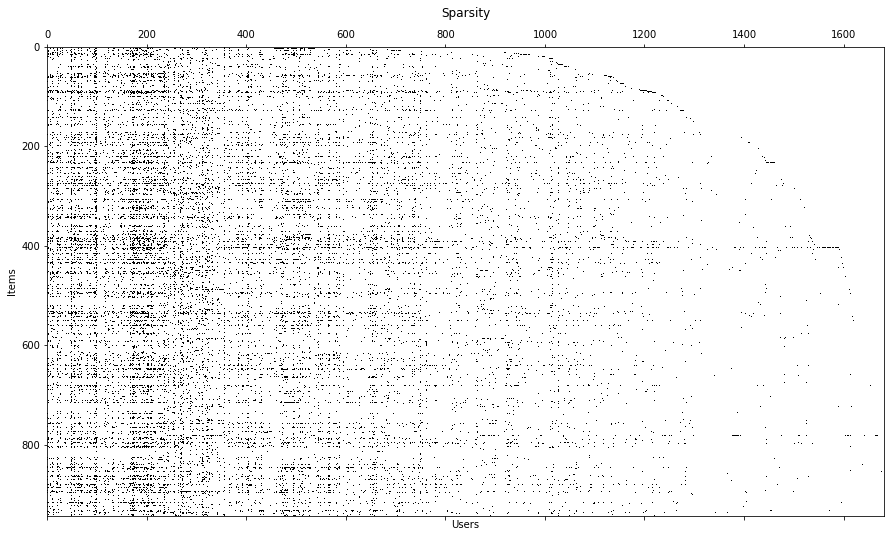

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
ax.spy(model.matrix)
ax.set_title('Sparsity'), ax.set_ylabel('Items'), ax.set_xlabel('Users')

## Prevendo notas

In [26]:
df_predictions = pd.DataFrame(model.predictions, columns=['user', 'item', 'rating'])
df_predictions.head()

,user,item,rating
0,1,4,4.106428
1,1,13,4.258309
2,1,16,3.472239
3,1,19,3.662876
4,1,20,4.145067


## Associando ID com Título

In [27]:
df_final = df_predictions.join(df_info, on='item', rsuffix='r').drop(['itemr'], axis=1)
df_final.head()

,user,item,rating,title
0,1,4,4.106428,Copycat (1995)
1,1,13,4.258309,"Postino, Il (1994)"
2,1,16,3.472239,From Dusk Till Dawn (1996)
3,1,19,3.662876,Angels and Insects (1995)
4,1,20,4.145067,Muppet Treasure Island (1996)


## Criando lista de recomendações Top-N

In [28]:
user = 21
top_n = 10
df_final[df_final.user == user].sort_values(['rating'], ascending=False).head(top_n)

,user,item,rating,title
909,21,443,4.816435,"Blob, The (1958)"
891,21,129,4.632550,Kansas City (1996)
889,21,100,4.456334,Heavy Metal (1981)
887,21,56,4.259501,Priest (1994)
895,21,234,4.089215,Mars Attacks! (1996)
892,21,164,4.025996,Jean de Florette (1986)
888,21,98,3.836821,Snow White and the Seven Dwarfs (1937)
917,21,675,3.807338,"Crucible, The (1996)"
893,21,219,3.789173,"Mirror Has Two Faces, The (1996)"
925,21,834,3.642938,"Gay Divorcee, The (1934)"
